In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')


## Step-1. Data Understanding and preparation

#### Data Dictionary

=========================================
Dataset characteristics
======================

day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


#### Load the file day.csv

In [2]:
bike = pd.read_csv("day.csv")

#### Check the data types

In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### check the shape

In [4]:
bike.shape

(730, 16)

#### Glance into the data set

In [5]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### High level view of data set

In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### - Observations : The scales are different for various columns. we will need to normalize the data(will be done later). 

### one hot encoding on Weathersit, season, weekday & mnth

#### 1-hot encoding on Weathersit

    - 00 means 'Clear_Weather'
    - 10 means 'Mist_or_cloud'
    - 01 means 'light rain'

In [7]:
weather = pd.get_dummies(bike['weathersit'],drop_first = True)
weather.rename(columns={1:'Clear_Weather', 2:'Mist_or_cloud', 3:'Light_rain'}, inplace=True)
weather.head()

,Mist_or_cloud,Light_rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [8]:
#Concatenate weather to bike
bike = pd.concat([bike,weather], axis=1)
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Mist_or_cloud,Light_rain
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0


#### 1-hot encoding on season

    - 000 means 'spring'
    - 100 means 'summer'
    - 010 means 'fall'
    - 001 means 'winter'

In [9]:
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [10]:
season_name = pd.get_dummies(bike['season'], drop_first = True)
season_name.rename(columns={2:'summer', 3:'fall', 4:'winter'}, inplace=True)
season_name.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [11]:
# Concatenate season_name to bike
bike = pd.concat([bike,season_name], axis=1)
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Mist_or_cloud,Light_rain,summer,fall,winter
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0


#### 1-hot encoding on weekday

    - 000000 means 'Sunday'
    - 100000 means 'Monday'
    - 010000 means 'Tuesday'
    - 001000 means 'Wednesday'
    - 000100 means 'Thursday'
    - 000010 means 'Friday'
    - 000001 means 'Saturday'

In [12]:
Weekday_name = pd.get_dummies(bike.weekday)
Weekday_name.rename(columns={0:'Day_Tue', 1:'Day_Wed', 2:'Day_Thu', 3:'Day_Fri', 4:'Day_Sat', 5:'Day_Sun', 6:'Day_Mon'}, inplace=True)
Weekday_name = Weekday_name.drop(columns=['Day_Sun'], axis=1)

In [13]:
# Concatenate Weekday_name to bike
bike = pd.concat([bike,Weekday_name], axis=1)
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Mist_or_cloud,Light_rain,summer,fall,winter,Day_Mon,Day_Tue,Day_Wed,Day_Thu,Day_Fri,Day_Sat
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,0,0,0,0,0,0,1
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,0,0,0,0,0,0,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0,1,0,0,0,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0,0,1,0,0,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0,0,0,1,0,0,0


#### 1-hot encoding on weekday

    - 00000000000 means 'Month_Jan'
    - 10000000000 means 'Month_Feb'
    - 01000000000 means 'Month_Mar'
    - 00100000000 means 'Month_Apr'
    - 00010000000 means 'Month_May'
    - 00001000000 means 'Month_June'
    - 00000100000 means 'Month_July'
    - 00000010000 means 'Month_Aug'
    - 00000001000 means 'Month_Sep'
    - 00000000100 means 'Month_Oct'
    - 00000000010 means 'Month_Nov'
    - 00000000001 means 'Month_Dec'

In [14]:
month_name = pd.get_dummies(bike.mnth)
month_name.rename(columns={1:'Month_Jan', 2:'Month_Feb', 3:'Month_Mar', 4:'Month_Apr', 5:'Month_May', 6:'Month_June', 7:'Month_July', 8:'Month_Aug', 9:'Month_Sep', 10:'Month_Oct', 11:'Month_Nov', 12:'Month_Dec'}, inplace=True)
month_name = month_name.drop(columns=['Month_Jan'], axis=1)
# Concatenate month_name to bike
bike = pd.concat([bike,month_name], axis=1)
bike.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Mist_or_cloud,Light_rain,summer,fall,winter,Day_Mon,Day_Tue,Day_Wed,Day_Thu,Day_Fri,Day_Sat,Month_Feb,Month_Mar,Month_Apr,Month_May,Month_June,Month_July,Month_Aug,Month_Sep,Month_Oct,Month_Nov,Month_Dec
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Drop 'weekday','season','weathersit' as we already did 1-hot encoding for these columns. 'Registered' and 'casual' can be dropped as we are predicting count which is the summation of two and it's not adding any extra information.


In [15]:
bike = bike.drop(columns=['weekday','season','weathersit', 'mnth', 'registered', 'casual'], axis =1)


## 2. Data cleanup

#### check/drop duplicates 

In [16]:
bike = bike.drop_duplicates()
bike.shape

(730, 32)

#### Check for missing values

In [17]:
bike.isnull().values.any()

False

#### No missing values found

In [18]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   instant        730 non-null    int64  
 1   dteday         730 non-null    object 
 2   yr             730 non-null    int64  
 3   holiday        730 non-null    int64  
 4   workingday     730 non-null    int64  
 5   temp           730 non-null    float64
 6   atemp          730 non-null    float64
 7   hum            730 non-null    float64
 8   windspeed      730 non-null    float64
 9   cnt            730 non-null    int64  
 10  Mist_or_cloud  730 non-null    uint8  
 11  Light_rain     730 non-null    uint8  
 12  summer         730 non-null    uint8  
 13  fall           730 non-null    uint8  
 14  winter         730 non-null    uint8  
 15  Day_Mon        730 non-null    uint8  
 16  Day_Tue        730 non-null    uint8  
 17  Day_Wed        730 non-null    uint8  
 18  Day_Thu   

#### Check correlation matrix

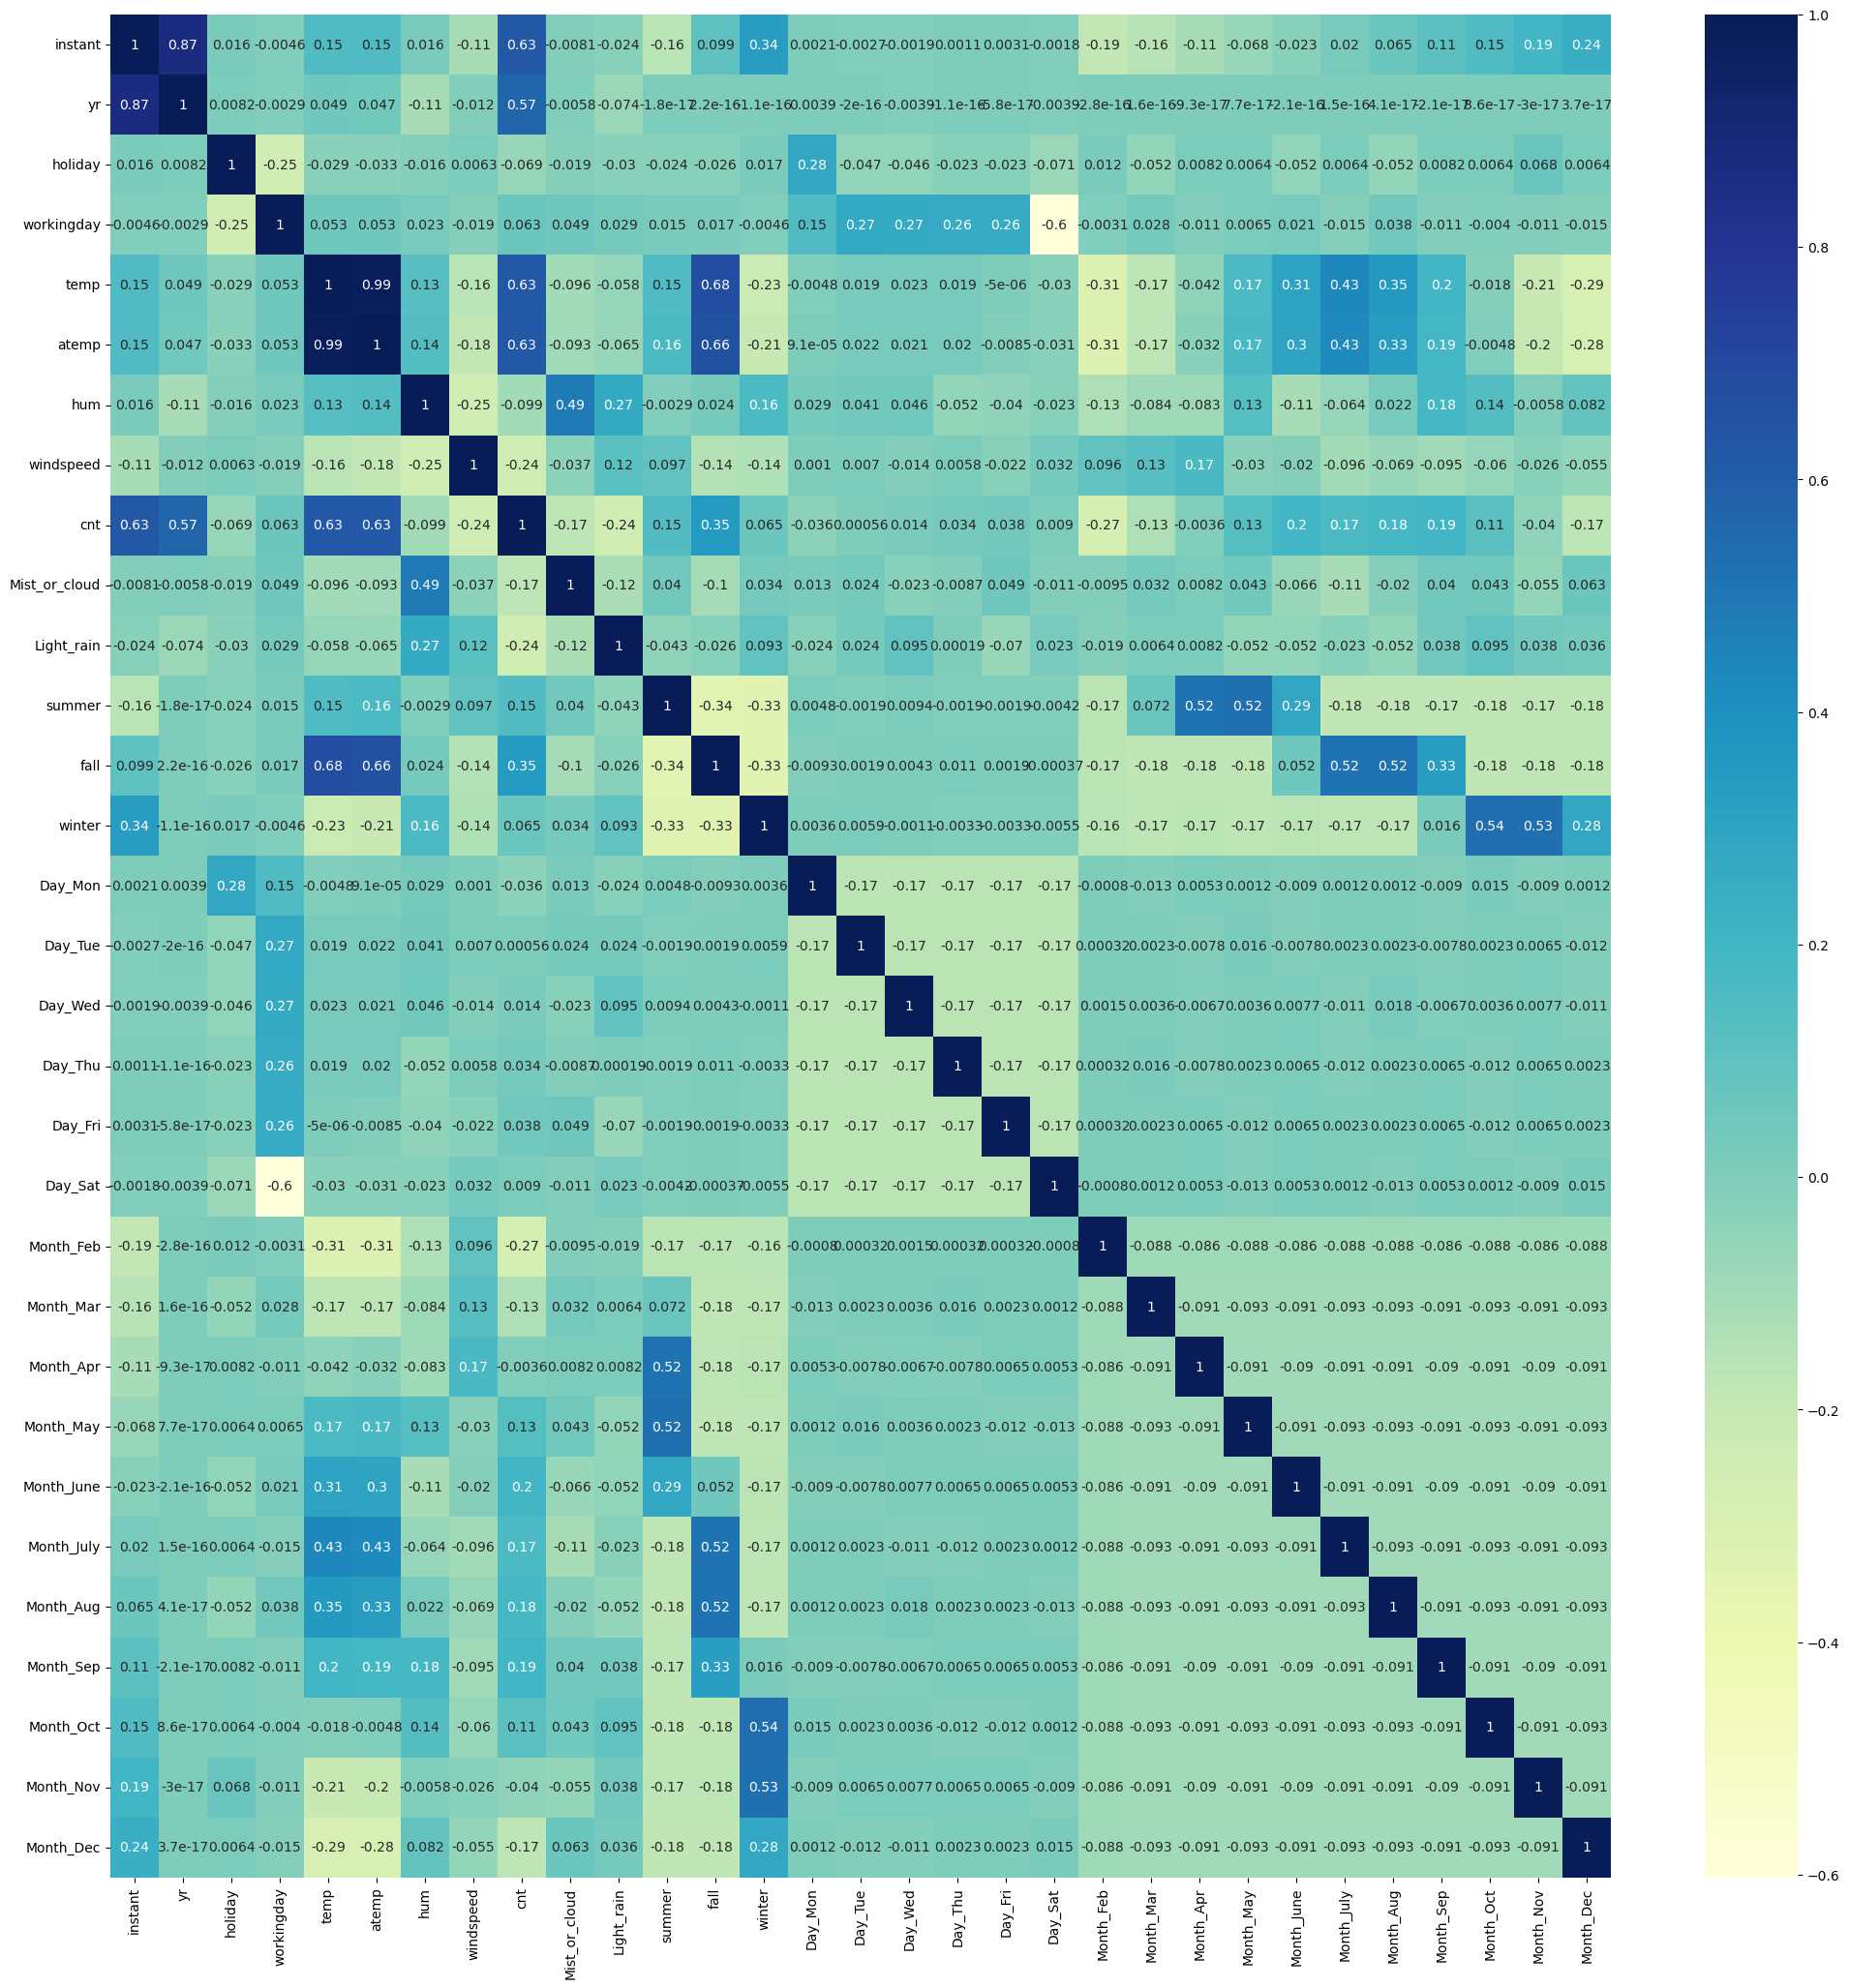

In [19]:
plt.figure(figsize=(25,25))
sns.heatmap(bike.corr(), cmap="YlGnBu", annot = True)
plt.show()

#### - Observations : Based on the correlation matrix let's remove following columns which is not adding much value:--

    - instant (This is just the id and it won't add useful information)
    - dteday ( we already have information about year and month in yr and mnth column, so can be removed)
    - temp and atemp gives similar information and highly correlated. we will drop atemp


#### Dropping columns instant, dteday, temp  based on above observation

In [20]:
# check shape

bike.shape

(730, 32)

In [21]:
bike = bike.drop(columns=["instant", "dteday", "atemp"])
bike.shape, bike.head()

((730, 29),
    yr  holiday  workingday       temp      hum  windspeed   cnt  \
 0   0        0           0  14.110847  80.5833  10.749882   985   
 1   0        0           0  14.902598  69.6087  16.652113   801   
 2   0        0           1   8.050924  43.7273  16.636703  1349   
 3   0        0           1   8.200000  59.0435  10.739832  1562   
 4   0        0           1   9.305237  43.6957  12.522300  1600   
 
    Mist_or_cloud  Light_rain  summer  fall  winter  Day_Mon  Day_Tue  Day_Wed  \
 0              1           0       0     0       0        0        0        0   
 1              1           0       0     0       0        0        0        0   
 2              0           0       0     0       0        1        0        0   
 3              0           0       0     0       0        0        1        0   
 4              0           0       0     0       0        0        0        1   
 
    Day_Thu  Day_Fri  Day_Sat  Month_Feb  Month_Mar  Month_Apr  Month_May  \
 0     

##### check and drop  outliers( < (Q1 - 1.5* IQR ) and > (Q3 + 1.5*IQR) )

<AxesSubplot:xlabel='windspeed'>

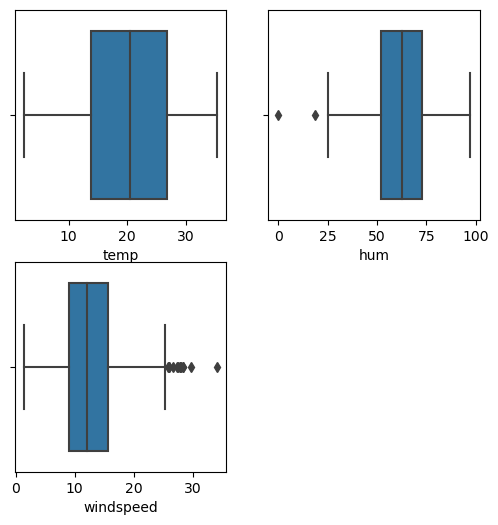

In [22]:
plt.figure(figsize=(6, 6))
plt.subplot(2,2,1)
sns.boxplot(bike["temp"]) 
plt.subplot(2,2,2)
sns.boxplot(bike["hum"])
plt.subplot(2,2,3)
sns.boxplot(bike["windspeed"])

In [23]:
bike.shape

(730, 29)

In [24]:
col = ["temp", "hum", "windspeed"]
for i in col:
    percentile_25 = np.quantile(bike[i], q=0.25)
    percentile_75 = np.quantile(bike[i], q=0.75)
    IQR = percentile_75 - percentile_25
    outliers_lower = percentile_25 - 1.5 * IQR
    outliers_upper = percentile_75 + 1.5 * IQR
    bike = bike[(bike[i]>outliers_lower) & (bike[i]<outliers_upper)]
    

In [25]:
bike.shape

(716, 29)

#### 14 rows got cleaned up as per the outlier treatment

#### Visualize non-categorical columns after outlier treatment

<AxesSubplot:xlabel='windspeed'>

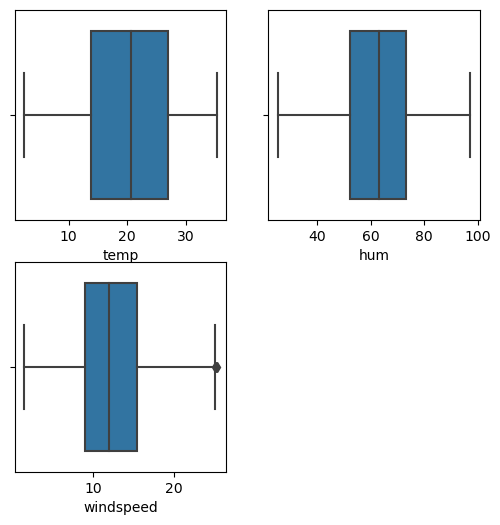

In [26]:
plt.figure(figsize=(6, 6))
plt.subplot(2,2,1)
sns.boxplot(bike["temp"]) 
plt.subplot(2,2,2)
sns.boxplot(bike["hum"])
plt.subplot(2,2,3)
sns.boxplot(bike["windspeed"])

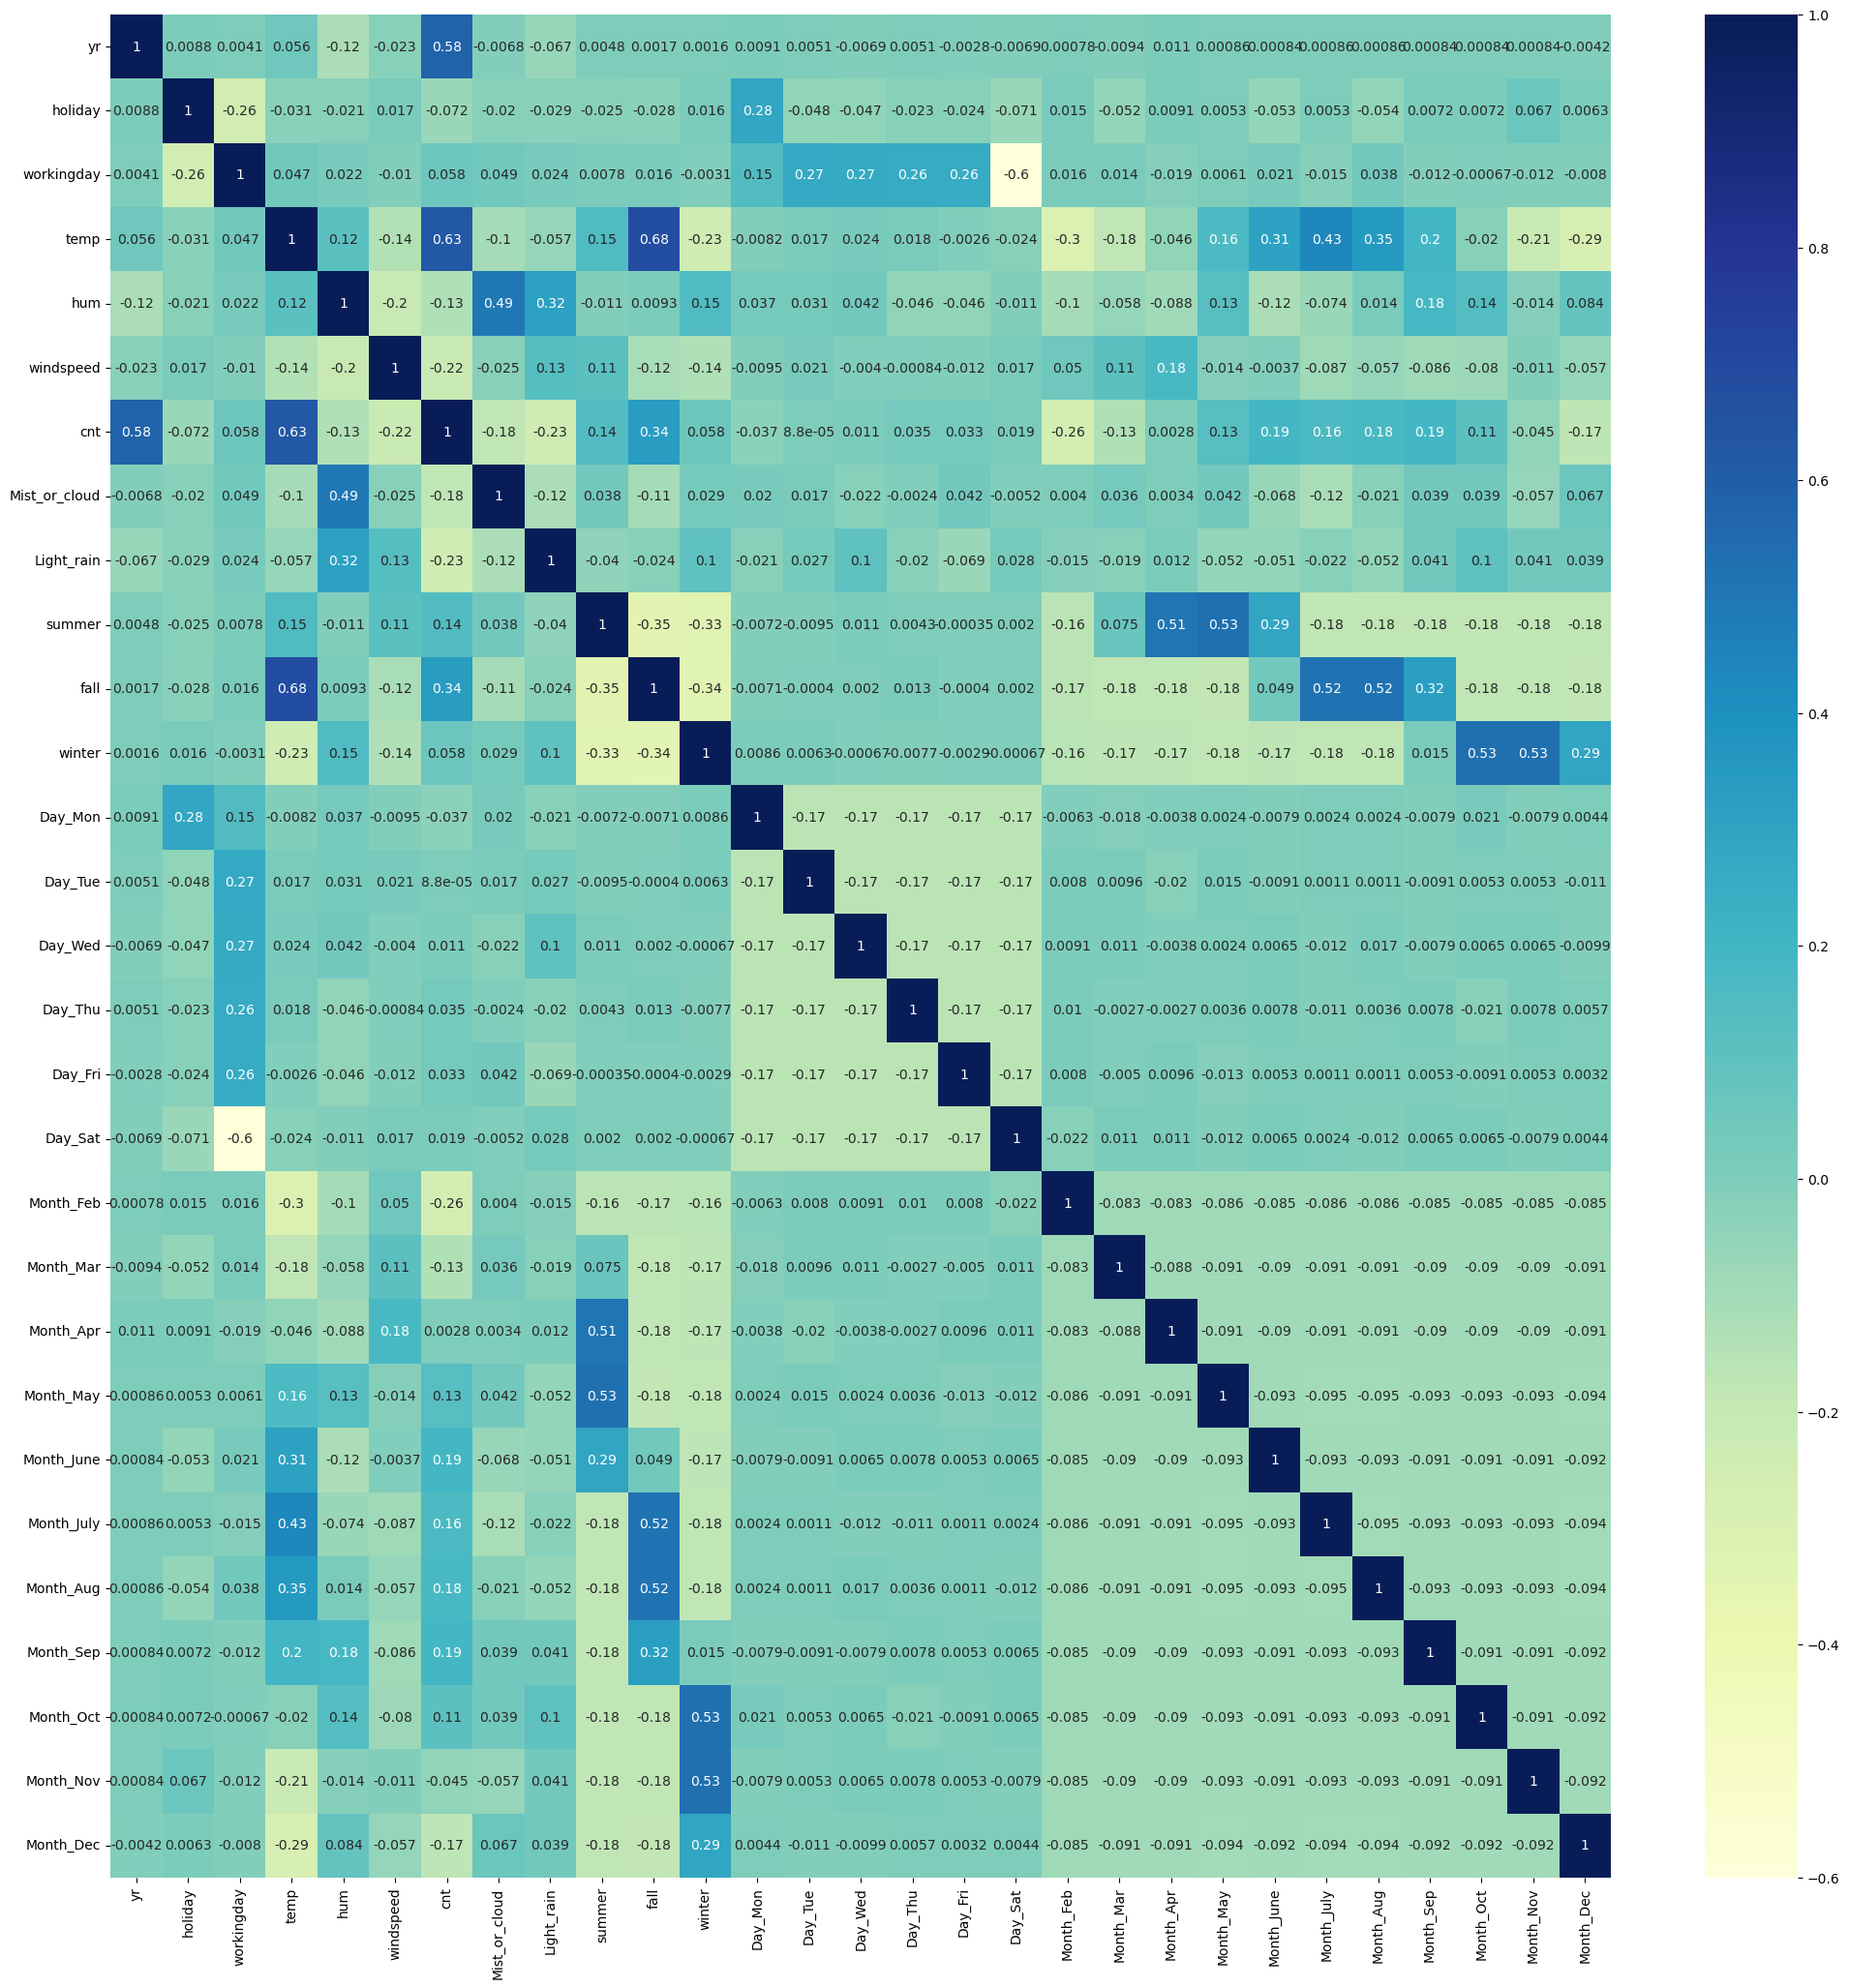

In [27]:
plt.figure(figsize=(25,25))
sns.heatmap(bike.corr(), cmap="YlGnBu", annot = True)
plt.show()

#### Drop the highly correlated feature > 0.6 after normalization

#### Based on above observation, following column can be dropped:--

    - Fall column (Fall and atemp are highly correlated and provide similar information, however atemp contributes more to target variable 'cnt')
    - Day_Sat can be removed as it's highly correlated to 'working_day'.

In [28]:
bike = bike.drop(columns=['fall','Day_Sat'], axis =1)

## Step 3. Visualization

#### Non-categorical variables Visualization against target variable count.

<Figure size 640x480 with 0 Axes>

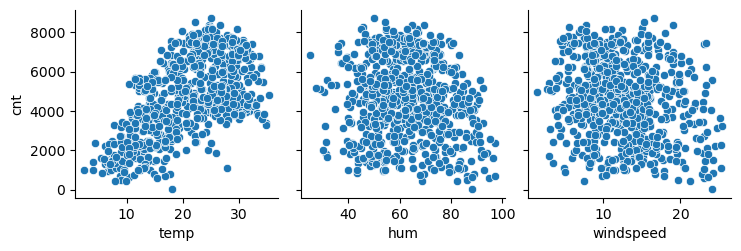

In [29]:
from scipy.stats import boxcox 

fig = plt.figure()
sns.pairplot(data=bike,
                  y_vars=['cnt'],
                  x_vars=bike.columns[3:6])

<AxesSubplot:ylabel='Count'>

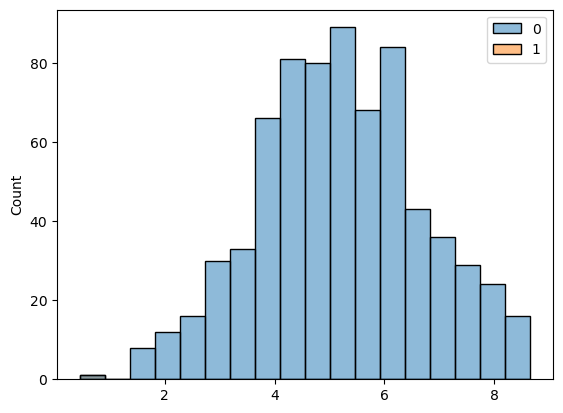

In [30]:
sns.histplot(boxcox(bike.windspeed))


<AxesSubplot:xlabel='windspeed', ylabel='Count'>

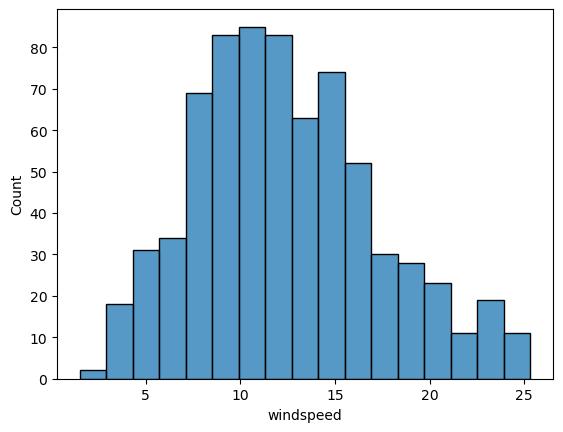

In [31]:
sns.histplot(bike.windspeed)

#### Observation: atemp is a bit linear in nature for middle range values but humidity and windspeed are not.

In [32]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'Mist_or_cloud', 'Light_rain', 'summer', 'winter', 'Day_Mon', 'Day_Tue',
       'Day_Wed', 'Day_Thu', 'Day_Fri', 'Month_Feb', 'Month_Mar', 'Month_Apr',
       'Month_May', 'Month_June', 'Month_July', 'Month_Aug', 'Month_Sep',
       'Month_Oct', 'Month_Nov', 'Month_Dec'],
      dtype='object')

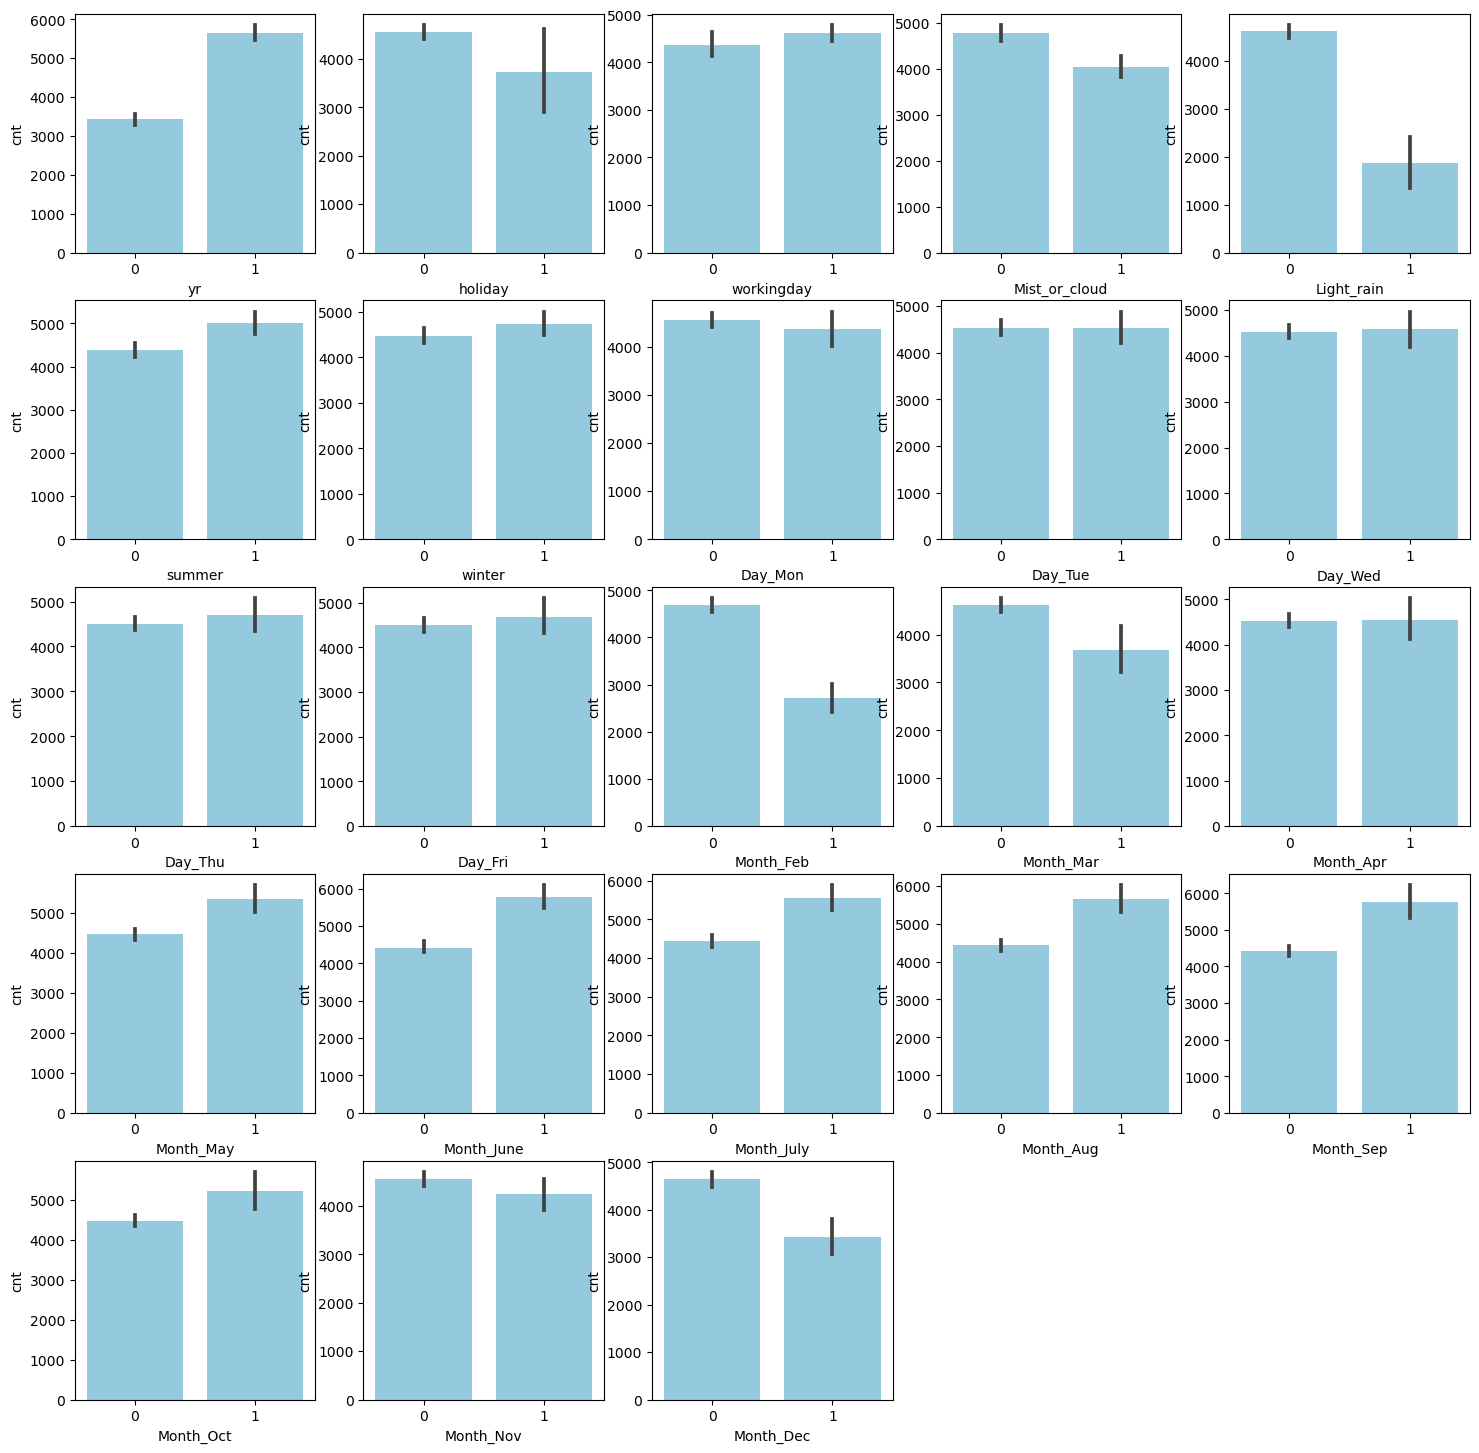

In [33]:
plt.figure(figsize=(18, 18))
col1 = ['yr', 'holiday', 'workingday','Mist_or_cloud', 'Light_rain', 'summer', 'winter', 'Day_Mon', 'Day_Tue',
       'Day_Wed', 'Day_Thu', 'Day_Fri', 'Month_Feb', 'Month_Mar', 'Month_Apr',
       'Month_May', 'Month_June', 'Month_July', 'Month_Aug', 'Month_Sep',
       'Month_Oct', 'Month_Nov', 'Month_Dec']
j=1
for i in col1:
    plt.subplot(5,5,j)
    sns.barplot(data=bike, x=i, y='cnt', color="skyblue")
    j = j+1


#### Observations:-- 
    - More bikes were used in 2019 compared to 2018
    - More bikes were used on working day than holidays (One reason can be many people are relying on bike for work)
    - Mist/cloudy day had more bike users than rainy days.
    - Monday has less bike user than other days(one reason can be people may take leave on mondays to club with weekends)
    - Nov to March has lesser bike users when compared to other months.
    

## 5. Feature scaling/Normalization and test-train split

#### Use sklearn inbuilt function(train_test_split) to divide training and test set in 7:3 ratio

In [34]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 39)
df_train.shape, df_test.shape, bike.shape

((501, 27), (215, 27), (716, 27))

#### Normalization using sklearn MinMaxScaler

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [36]:
df_train.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,Mist_or_cloud,Light_rain,summer,winter,Day_Mon,Day_Tue,Day_Wed,Day_Thu,Day_Fri,Month_Feb,Month_Mar,Month_Apr,Month_May,Month_June,Month_July,Month_Aug,Month_Sep,Month_Oct,Month_Nov,Month_Dec
714,1,0,0,14.862500,83.8750,6.749714,3786,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
284,0,0,1,22.276653,90.6250,16.626050,2416,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
435,1,0,1,19.133347,48.9167,13.916771,5298,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
256,0,0,1,27.606653,69.7083,11.209100,4785,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
725,1,0,1,10.420847,65.2917,23.458911,2114,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [37]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'Mist_or_cloud', 'Light_rain', 'summer', 'winter', 'Day_Mon', 'Day_Tue',
       'Day_Wed', 'Day_Thu', 'Day_Fri', 'Month_Feb', 'Month_Mar', 'Month_Apr',
       'Month_May', 'Month_June', 'Month_July', 'Month_Aug', 'Month_Sep',
       'Month_Oct', 'Month_Nov', 'Month_Dec'],
      dtype='object')

In [38]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

df_train.head()



,yr,holiday,workingday,temp,hum,windspeed,cnt,Mist_or_cloud,Light_rain,summer,winter,Day_Mon,Day_Tue,Day_Wed,Day_Thu,Day_Fri,Month_Feb,Month_Mar,Month_Apr,Month_May,Month_June,Month_July,Month_Aug,Month_Sep,Month_Oct,Month_Nov,Month_Dec
714,1,0,0,0.353391,0.813805,0.175976,0.441111,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
284,0,0,1,0.593655,0.907773,0.619870,0.280558,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
435,1,0,1,0.491792,0.327146,0.498101,0.618305,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
256,0,0,1,0.766379,0.616589,0.376404,0.558186,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
725,1,0,1,0.209455,0.555105,0.926975,0.245166,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [39]:
df_train.shape

(501, 27)

#### After Normalization the max values for all the columns are between 0 & 1

In [40]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Mist_or_cloud,Light_rain,summer,winter,Day_Mon,Day_Tue,Day_Wed,Day_Thu,Day_Fri,Month_Feb,Month_Mar,Month_Apr,Month_May,Month_June,Month_July,Month_Aug,Month_Sep,Month_Oct,Month_Nov,Month_Dec
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,0.493014,0.029940,0.706587,0.528120,0.528767,0.432466,0.523525,0.339321,0.031936,0.233533,0.251497,0.139721,0.151697,0.145709,0.153693,0.145709,0.079840,0.087824,0.075848,0.075848,0.081836,0.095808,0.073852,0.083832,0.081836,0.093812,0.087824
std,0.500451,0.170592,0.455781,0.245317,0.194632,0.212412,0.226867,0.473952,0.176006,0.423501,0.434307,0.347043,0.359085,0.353166,0.361014,0.353166,0.271317,0.283322,0.265020,0.265020,0.274389,0.294622,0.261792,0.277413,0.274389,0.291859,0.283322
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.316854,0.384571,0.275286,0.356967,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.533865,0.524361,0.410068,0.529357,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.749771,0.668793,0.567398,0.691550,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Pop the dependent variable('cnt') from the training data set

In [41]:
y_train = df_train.pop('cnt')
X_train = df_train
y_test = df_test.pop('cnt')
X_test = df_test

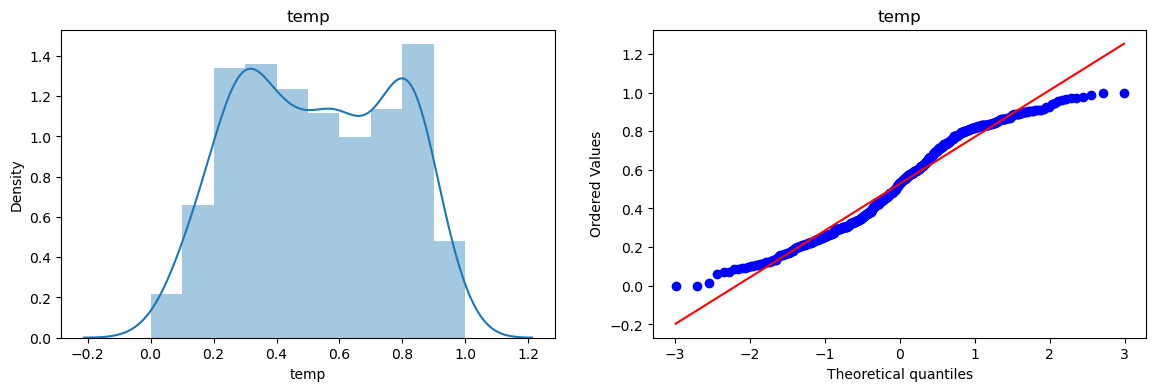

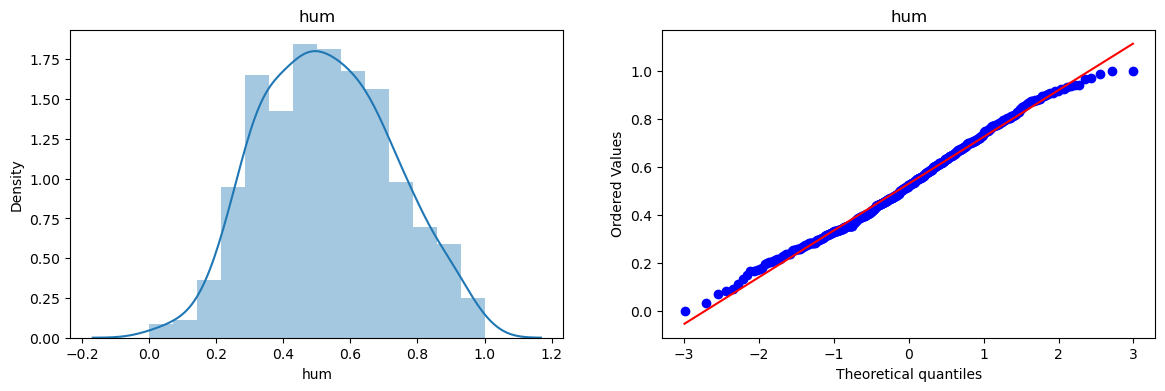

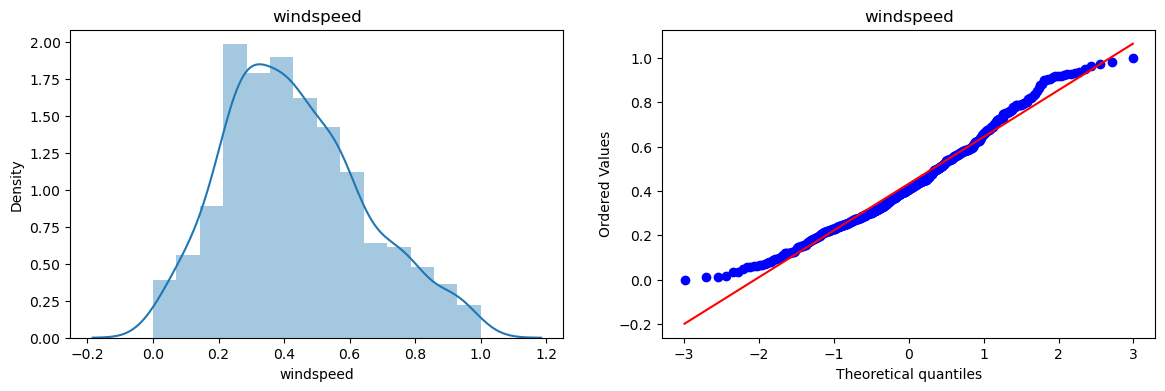

In [42]:
from scipy import stats 
cols = ['temp', 'hum', 'windspeed']
for col in cols:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [43]:
#len(X_train.columns)
#len(X_test.columns)
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,yr,-0.120959
1,holiday,-48.186050
2,workingday,4.014548
3,temp,0.844681
4,hum,0.563698
5,windspeed,-0.320674
6,Mist_or_cloud,-2.972888
7,Light_rain,-45.174423
8,summer,-5.698614
9,winter,-5.139862


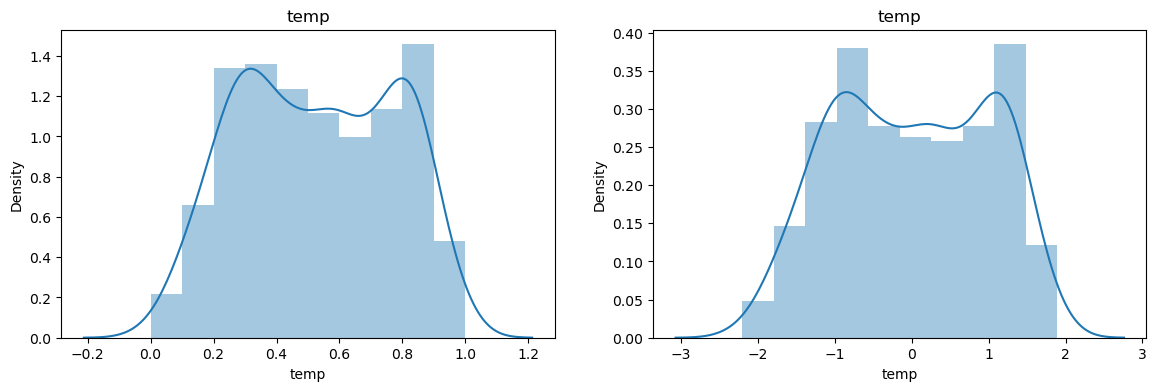

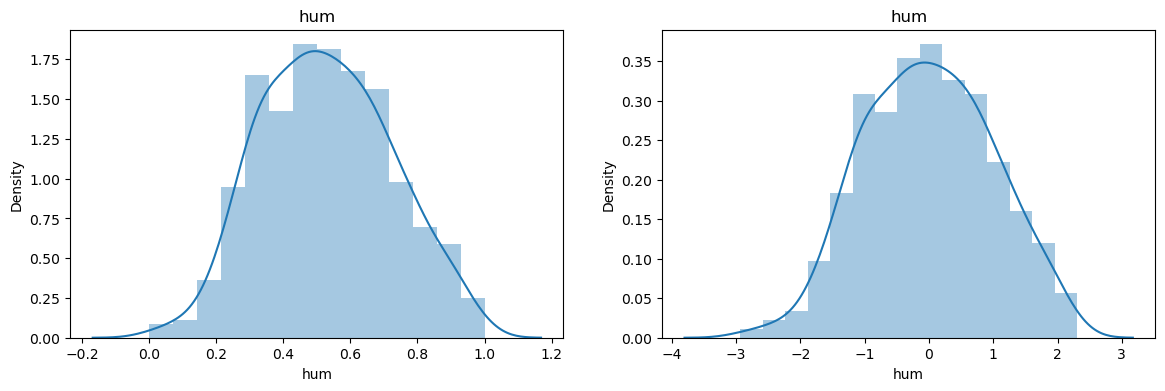

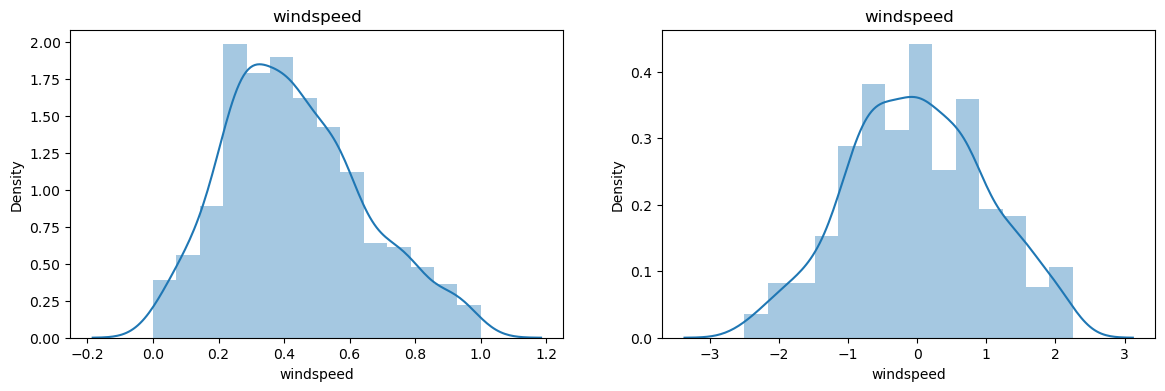

In [44]:
# Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in cols:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)

    plt.show()

## Step - 4. Model building

#### Since there are 26 features, we will use sklearn RFE to find top 13 features impacting the dependent variable ('cnt')

In [45]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [46]:
y_train.shape, X_train.shape

((501,), (501, 26))

#### Function to create model and calculate VIF

In [47]:
# Adding a constant variable 
def create_model_calc_vif(X_train,y_train):
    features = pd.DataFrame(X_train).columns
    
    X_train = sm.add_constant(X_train)
    lm = sm.OLS(y_train,X_train).fit()   # Running the linear model
    #Let's see the summary of our linear model
    print(lm.summary())
    def calculate_vif(X_train):
        vif = pd.DataFrame()
        X = X_train
        vif['Features'] = X.columns
        vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        print(vif)
    return calculate_vif(X_train)

In [48]:
create_model_calc_vif(X_train,y_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     96.50
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          1.82e-168
Time:                        01:48:59   Log-Likelihood:                 484.90
No. Observations:                 501   AIC:                            -917.8
Df Residuals:                     475   BIC:                            -808.2
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1927      0.026      7.450

#### observation: VIF looks good. p-value of Month_Aug and Month_June > 0.05. let's remove it Month_Aug first as it has slightly higher VIF when compared to Month_June


In [49]:
X_train_model_2 =  X_train.drop(columns=['Day_Fri'], axis =1)
create_model_calc_vif(X_train_model_2,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     96.50
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          1.82e-168
Time:                        01:48:59   Log-Likelihood:                 484.90
No. Observations:                 501   AIC:                            -917.8
Df Residuals:                     475   BIC:                            -808.2
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1927      0.026      7.450

#### p-value and VIF looks good. So, this is our best model

In [50]:
X_train_model_3 =  X_train_model_2.drop(columns=['Month_July'], axis =1)
create_model_calc_vif(X_train_model_3,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     99.95
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          8.39e-169
Time:                        01:48:59   Log-Likelihood:                 483.26
No. Observations:                 501   AIC:                            -916.5
Df Residuals:                     476   BIC:                            -811.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2002      0.026      7.830

In [51]:
X_train_model_4 =  X_train_model_3.drop(columns=['Month_Nov'], axis =1)
create_model_calc_vif(X_train_model_4,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     104.4
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          9.76e-170
Time:                        01:48:59   Log-Likelihood:                 483.07
No. Observations:                 501   AIC:                            -918.1
Df Residuals:                     477   BIC:                            -816.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2028      0.025      8.060

In [52]:
X_train_model_5 =  X_train_model_4.drop(columns=['Month_May'], axis =1)
create_model_calc_vif(X_train_model_5,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     108.0
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          1.05e-169
Time:                        01:48:59   Log-Likelihood:                 480.49
No. Observations:                 501   AIC:                            -915.0
Df Residuals:                     478   BIC:                            -818.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2047      0.025      8.104

In [53]:
X_train_model_6 =  X_train_model_5.drop(columns=['workingday'], axis =1)
create_model_calc_vif(X_train_model_6,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     112.9
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          2.47e-170
Time:                        01:48:59   Log-Likelihood:                 479.52
No. Observations:                 501   AIC:                            -915.0
Df Residuals:                     479   BIC:                            -822.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2108      0.025      8.473

In [54]:
X_train_model_7 =  X_train_model_6.drop(columns=['Month_Apr'], axis =1)
create_model_calc_vif(X_train_model_7,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     118.4
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          4.65e-171
Time:                        01:49:00   Log-Likelihood:                 478.75
No. Observations:                 501   AIC:                            -915.5
Df Residuals:                     480   BIC:                            -826.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2143      0.025      8.669

In [55]:
X_train_model_8 =  X_train_model_7.drop(columns=['Month_Oct'], axis =1)
create_model_calc_vif(X_train_model_8,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     123.5
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          3.72e-171
Time:                        01:49:00   Log-Likelihood:                 476.43
No. Observations:                 501   AIC:                            -912.9
Df Residuals:                     481   BIC:                            -828.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2095      0.025      8.480

In [56]:
X_train_model_9 =  X_train_model_8.drop(columns=['Month_Feb'], axis =1)
create_model_calc_vif(X_train_model_9,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     130.4
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          4.43e-172
Time:                        01:49:00   Log-Likelihood:                 476.09
No. Observations:                 501   AIC:                            -914.2
Df Residuals:                     482   BIC:                            -834.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2033      0.023      8.664

In [57]:
X_train_model_10 =  X_train_model_9.drop(columns=['Day_Mon'], axis =1)
create_model_calc_vif(X_train_model_10,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     138.1
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          5.32e-173
Time:                        01:49:00   Log-Likelihood:                 475.72
No. Observations:                 501   AIC:                            -915.4
Df Residuals:                     483   BIC:                            -839.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2012      0.023      8.625

In [58]:
X_train_model_11 =  X_train_model_10.drop(columns=['Month_June'], axis =1)
create_model_calc_vif(X_train_model_11,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     147.0
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          4.52e-174
Time:                        01:49:00   Log-Likelihood:                 475.67
No. Observations:                 501   AIC:                            -917.3
Df Residuals:                     484   BIC:                            -845.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2015      0.023      8.657

In [59]:
X_train_model_12 =  X_train_model_11.drop(columns=['Month_Dec'], axis =1)
create_model_calc_vif(X_train_model_12,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     156.7
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          6.04e-175
Time:                        01:49:00   Log-Likelihood:                 475.12
No. Observations:                 501   AIC:                            -918.2
Df Residuals:                     485   BIC:                            -850.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1976      0.023      8.603

In [60]:
X_train_model_13 =  X_train_model_12.drop(columns=['Day_Wed'], axis =1)
create_model_calc_vif(X_train_model_13,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     168.2
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          4.57e-176
Time:                        01:49:00   Log-Likelihood:                 475.12
No. Observations:                 501   AIC:                            -920.2
Df Residuals:                     486   BIC:                            -857.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1975      0.023      8.646

In [61]:
X_train_model_14 =  X_train_model_13.drop(columns=['Month_Mar'], axis =1)
create_model_calc_vif(X_train_model_14,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     180.7
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          8.09e-177
Time:                        01:49:00   Log-Likelihood:                 474.20
No. Observations:                 501   AIC:                            -920.4
Df Residuals:                     487   BIC:                            -861.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2023      0.023      8.960

In [62]:
X_train_model_15 =  X_train_model_14.drop(columns=['Day_Tue'], axis =1)
create_model_calc_vif(X_train_model_15,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     196.2
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          5.65e-178
Time:                        01:49:00   Log-Likelihood:                 474.20
No. Observations:                 501   AIC:                            -922.4
Df Residuals:                     488   BIC:                            -867.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2023      0.023      8.988

In [63]:
X_train_model_16 =  X_train_model_15.drop(columns=['Day_Thu'], axis =1)
create_model_calc_vif(X_train_model_16,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     213.7
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          7.69e-179
Time:                        01:49:00   Log-Likelihood:                 473.46
No. Observations:                 501   AIC:                            -922.9
Df Residuals:                     489   BIC:                            -872.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2053      0.022      9.167

## Step 5 - Residual Analysis of the train data and Goodness of fit check.

#### Goodness of fit - Normality Check

Text(0.5, 0, 'Errors')

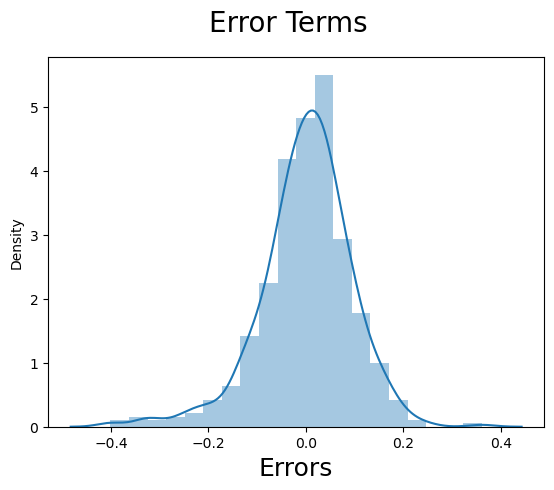

In [64]:
# Plot the histogram of the error terms
X_train_final = X_train_model_16
X_train_rfe_model_final = sm.add_constant(X_train_final)
lm_final = sm.OLS(y_train,X_train_rfe_model_final).fit() 
y_train_pred_final = lm_final.predict(X_train_rfe_model_final)
fig = plt.figure()
sns.distplot((y_train - y_train_pred_final), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Observation : - Even though it has light tail error term seems to be normally distributed as it's a bell-shape curve with the peak at 0.

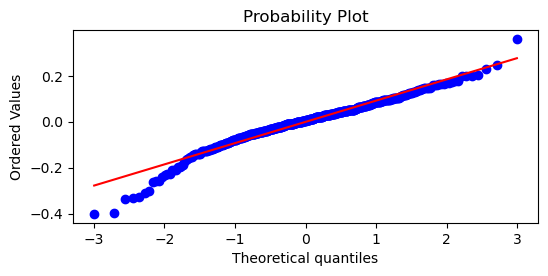

In [65]:
# Plot residual Q-Q plot
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(y_train - y_train_pred_final, plot=ax, fit=True)

#### Observation: Good fit shows normality is a reasonable approximation even though it has light tails

#### Observations:--
#### High value of omnibus and lower probability of omnibus indicate residual is not perfect normal and a bit skewed
#### Negative skew values shows it has fatter tail on the left side which can be observed in the residual histogram.
#### Lowe prob(JB) stats suggests residual is not completely normal
#### Durbin-watson ~2 shows model feature variables are independent with no correlation among each other


- Omnibus:                       65.090   Durbin-Watson:                   2.079
- Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.817
- Skew:                          -0.699   Prob(JB):                     1.32e-32
- Kurtosis:                       5.253   Cond. No.                         15.2

#### Homoscedasticity check using breuschpagan and white-Test

In [66]:
import statsmodels.stats.diagnostic as sms 
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(lm_final.resid, lm_final.model.exog)
list(zip(name, test))

[('Lagrange multiplier statistic', 36.20464988467867),
 ('p-value', 0.00015647193789300058),
 ('f-value', 3.4627309708778844),
 ('f p-value', 0.00011460929514018416)]

In [67]:
from statsmodels.stats.diagnostic import het_white
#perform White's test
white_test = het_white(lm_final.resid,  lm_final.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 120.17582825803984, 'Test Statistic p-value': 6.5626427960363406e-06, 'F-Statistic': 2.3141635237974656, 'F-Test p-value': 7.024960672793166e-07}


#### Observation : Both tests show the pvalue < 0.05, we can reject the null hypothesis and accept the alternate hypothesis which Heteroscedasticity is present

Text(0, 0.5, 'fitted')

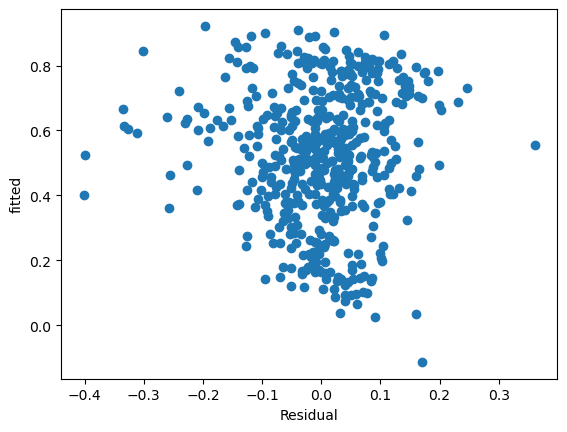

In [68]:
plt.scatter(y_train - y_train_pred_final, y_train_pred_final)
plt.xlabel("Residual")
plt.ylabel("fitted")

#### Observation : Same observation can be made using the Residual and fitted plot i.e. Heteroscedasticity is present

## Making predictions using final model

In [69]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,Mist_or_cloud,Light_rain,summer,winter,Day_Mon,Day_Tue,Day_Wed,Day_Thu,Day_Fri,Month_Feb,Month_Mar,Month_Apr,Month_May,Month_June,Month_July,Month_Aug,Month_Sep,Month_Oct,Month_Nov,Month_Dec
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.511628,0.027907,0.632558,0.543915,0.516354,0.436272,0.339535,0.018605,0.297674,0.232558,0.148837,0.125581,0.134884,0.111628,0.139535,0.055814,0.065116,0.093023,0.111628,0.088372,0.065116,0.116279,0.083721,0.088372,0.060465,0.079070
std,0.501031,0.165091,0.483233,0.241154,0.191810,0.225652,0.474657,0.135439,0.458303,0.423449,0.356759,0.332150,0.342397,0.315643,0.347312,0.230098,0.247307,0.291143,0.315643,0.284498,0.247307,0.321307,0.277615,0.284498,0.238903,0.270477
min,0.000000,0.000000,0.000000,-0.049680,0.049884,-0.059963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.327372,0.368619,0.277137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.589226,0.524361,0.425049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.742574,0.661832,0.563634,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.016608,0.954151,1.011217,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Remove 'cnt' from the test set and add it to y_test true label. Keep only columns which are relevant in the test set(drop the one which were dropped in training set)

In [70]:
#y_test = df_test.pop('cnt')
X_test = df_test[X_train_final.columns]

In [71]:
X_test.head()

,yr,holiday,temp,hum,windspeed,Mist_or_cloud,Light_rain,summer,winter,Month_Aug,Month_Sep
497,1,0,0.685553,0.448376,0.550510,0,0,1,0,0,0
233,0,0,0.790738,0.300464,0.705994,0,0,0,0,1,0
295,0,0,0.432003,0.678074,0.172273,0,0,0,1,0,0
103,0,0,0.492899,0.398492,0.205963,0,0,1,0,0,0
565,1,0,0.756414,0.821346,0.501877,1,0,0,0,0,0


#### Make prediction using final model and plot y_test vs y_pred

In [72]:
# Making predictions using the final model
#len(X_test.columns)
X_test_final = sm.add_constant(X_test)
len(X_test_final.columns)
y_test_pred_final = lm_final.predict(X_test_final)


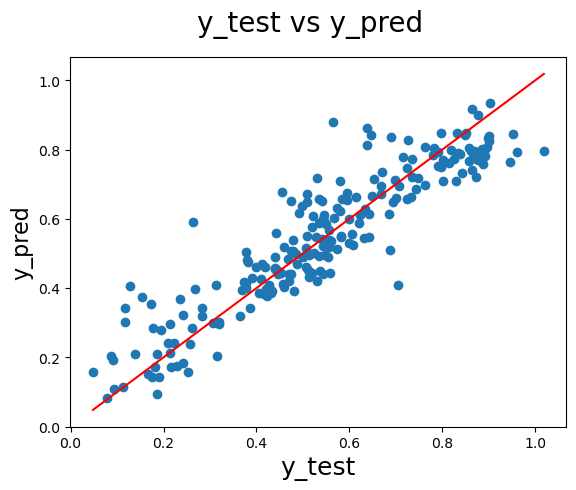

In [73]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred_final)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
X_plot = [y_test.min(), y_test.max()]
plt.plot(X_plot, X_plot, color='r')
plt.show()

#### Observation: Above graph looks linear with some variation

#### Accuracy on training data is 83% and test-data is 84%. Model is generalizing well on test data

In [74]:
from sklearn.metrics import r2_score
#r2_score(y_train,y_train_pred_final) , r2_score(y_test,y_test_pred_final)

print(f"R-square on training data is {r2_score(y_train,y_train_pred_final):.2f} and test data is {r2_score(y_test,y_test_pred_final):.2f}, difference is {(r2_score(y_train,y_train_pred_final)- r2_score(y_test,y_test_pred_final)):.2f}")
#y_train.shape, y_train_pred_final.shape, y_test.shape, y_test_pred_final.shape


R-square on training data is 0.83 and test data is 0.84, difference is -0.01


In [75]:
coeff = round(lm_final.params,2)
weights = coeff.sort_values(ascending = False)
print(weights)
print("\n\nFinal Model:")
for weight in range(0, len(weights)):
    print(weights[weight],'*',weights.index[weight],end ='')
    print(' + ',end ='')

temp             0.51
yr               0.24
const            0.21
winter           0.15
Month_Sep        0.11
summer           0.10
Month_Aug        0.06
Mist_or_cloud   -0.04
holiday         -0.09
windspeed       -0.09
hum             -0.16
Light_rain      -0.20
dtype: float64


Final Model:
0.51 * temp + 0.24 * yr + 0.21 * const + 0.15 * winter + 0.11 * Month_Sep + 0.1 * summer + 0.06 * Month_Aug + -0.04 * Mist_or_cloud + -0.09 * holiday + -0.09 * windspeed + -0.16 * hum + -0.2 * Light_rain + 

#### Observations/Conclusion:--
    
    -  temp, yr and winter are the top 3 contributers to the dependent variable count
    -  Winter season is attracting people more to use bikes.
    -  In Sep, Oct and Aug the demand is high for the bikes
    -  In case of high humidity, wind speed and rain, the demand is low as expected
    -  Bike riders increased in 2019 compared to 2018.
    -  Company need to go creating to increase the demand on the bad weather or summer days. Few suggestions are:-- 
            a)They can reduce the price maybe slice it by half
            b)Provide rain-coats along with the bike on rainy days
            c)Introduce and provide extra credits points during summer and bad weather days.

#### Best fit line equation:--
   #### = 0.51 * temp + 0.24 * yr  + 0.13 * winter + 0.12 * Month_Sep + 0.11 * summer + 0.07 * Month_Aug + 0.04 * Month_Oct + -0.05 * Mist_or_cloud + -0.09 * holiday + -0.09 * windspeed + -0.16 * hum + -0.21 * Light_rain + 0.21

#### We have got a decent model with decent accuracy(~84) but this model can be improved further. we have heteroscedasticity present which can be fixed by tranforming the variables.